## <div style="text-align: center"> First Impression about this RSNA Intracranial Hemorrhage
</div>
<img src="https://images.idgesg.net/images/article/2017/09/data-science-certification10-100734865-large.jpg">

   Bleeding, also called hemorrhage, is the name used to describe blood loss. It can refer to blood loss inside the body, called internal bleeding, or to blood loss outside of the body, called external bleeding.

In this we are working with 4 types and another any

- 1_epidural
- intraparenchymal
- intraventricular
- subarachnoid
- subdural
- any


<a id="top"></a> <br>
## Notebook  Content

1. [What is an intracranial hemorrhage](#1)
1. [Import](#2)
1. [Load Data](#3)
1. [Check images](#4)
1. [Visualization](#5)
1. [Working newTable ](#6)
1. [Visualization of hemorrhage epidural](#7)
1. [Visualization of hemorrhage Intraparenchymal](#8)
1. [Visualization of hemorrhage Intraparenchymal](#9)
1. [Visualization of hemorrhage Subarachnoid](#10)
1. [Visualization of hemorrhage subdural](#11)



**<a id="1"></a> <br>**
## 1- What is an intracranial hemorrhage

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F603584%2F56162e47358efd77010336a373beb0d2%2Fsubtypes-of-hemorrhage.png?generation=1568657910458946&alt=media">

Intracranial hemorrhage (ICH) refers to acute bleeding inside your skull or brain. It’s a life-threatening emergency. You should go to the emergency room right away or call 911 if you think you or someone you know is experiencing ICH.

### What are the types of ICH?

There are four types of ICH:

- epidural hematoma
- subdural hematoma
- subarachnoid hemorrhage
- intracerebral hemorrhage

### Epidural hematoma

<img src=" ">

A hematoma is a collection of blood, in a clot or ball, outside of a blood vessel. An epidural hematoma occurs when blood accumulates between your skull and the outermost covering of your brain.

It typically follows a head injury, and usually with a skull fracture. High-pressure bleeding is a prominent feature. If you have an epidural hematoma, you may briefly lose consciousness and then regain consciousness.

### Subdural hematoma

A subdural hematoma is a collection of blood on the surface of your brain.

It’s typically the result of your head moving rapidly forward and stopping, such as in a car accident. However, it could also suggest abuse in children. This is the same type of movement a child experiences when being shaken.

A subdural hematoma is more common than other ICHs in older people and people with history of heavy alcohol use.

### Intracerebral hemorrhage
Intracerebral hemorrhage is when there’s bleeding inside of your brain. This is the most common type of ICH that occurs with a stroke. It’s not usually the result of injury.

A prominent warning sign is the sudden onset of neurological deficit. This is a problem with your brain’s functioning. The symptoms progress over minutes to hours. They include:

- headache
- difficulty speaking
- nausea
- vomiting
- decreased consciousness
- weakness in one part of the body
- elevated blood pressure

**<a id="2"></a> <br>**
## 2- Import

In [1]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pylab as plt
import os
import seaborn as sns



In [2]:
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from tqdm import tqdm

Using TensorFlow backend.


In [3]:
!ls ../input

rsna-intracranial-hemorrhage-detection


<a id="3"></a> <br>
## 3- Load Data

**stage_1_train.csv** - the training set. Contains Ids and target information.
**stage_1_sample_submission.csv** - a sample submission file in the correct format. Contains Ids for the test set.


Stage 1 Images - **stage_1_train_images.zip** and **stage_1_test_images.zip**

- images for the current stage. Filenames are also patient names.



In [4]:
train = pd.read_csv('../input/rsna-intracranial-hemorrhage-detection/stage_1_train.csv')


In [5]:
train.head(10)

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0
5,ID_63eb1e259_any,0
6,ID_2669954a7_epidural,0
7,ID_2669954a7_intraparenchymal,0
8,ID_2669954a7_intraventricular,0
9,ID_2669954a7_subarachnoid,0


In [6]:
train.shape


(4045572, 2)

In [7]:
newtable = train.copy()

In [8]:
train.Label.isnull().sum()

0

In [9]:
# Images Example
train_images_dir = '../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]
test_images_dir = '../input/rsna-intracranial-hemorrhage-detection/stage_1_test_images/'
test_images = [f for f in listdir(test_images_dir) if isfile(join(test_images_dir, f))]
print('5 Training images', train_images[:5]) # Print the first 5

5 Training images ['ID_231d901c1.dcm', 'ID_994bc0470.dcm', 'ID_127689cce.dcm', 'ID_25457734a.dcm', 'ID_81c9aa125.dcm']


In [10]:
print('Total File sizes')
for f in os.listdir('../input/rsna-intracranial-hemorrhage-detection'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../input/rsna-intracranial-hemorrhage-detection/' + f) / 1000000, 2)) + 'MB')

Total File sizes
stage_1_sample_submission.csv 13.43MB
stage_1_train.csv             107.21MB
stage_1_test_images           2.71MB
stage_1_train_images          23.41MB


In [11]:
print('Number of train images:', len(train_images))
print('Number of test images:', len(test_images))

Number of train images: 674258
Number of test images: 78545


<a id="4"></a> <br>
## 4- Check images

## Overview of DICOM files and medical images
Medical images are stored in a special format known as DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. In Python, one popular library to access and manipulate DICOM files is the pydicom module. To use the pydicom library, first find the DICOM file for a given patientId by simply looking for the matching file in the stage_1_train_images/ folder, and the use the pydicom.read_file() method to load the data:

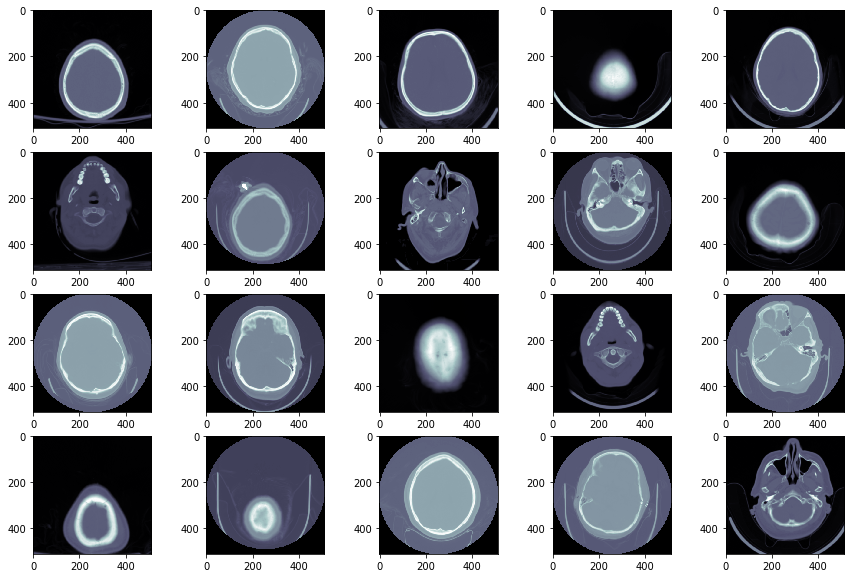

In [12]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(1, columns*rows +1):
    ds = pydicom.dcmread(train_images_dir + train_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    fig.add_subplot

In [13]:
print(ds) # this is file type of image

(0008, 0018) SOP Instance UID                    UI: ID_dd9408561
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_34096297'
(0020, 000d) Study Instance UID                  UI: ID_1d71cfa38d
(0020, 000e) Series Instance UID                 UI: ID_73b413d3f0
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-125', '-46', '73.7000732']
(0020, 0037) Image Orientation (Patient)         DS: ['1', '0', '0', '0', '1', '0']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.48828125', '0.48828125']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 12
(0028, 0102) High Bit 

In [14]:
im = ds.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint16
(512, 512)


<a id="5"></a> <br>
## 5- Visualization of data

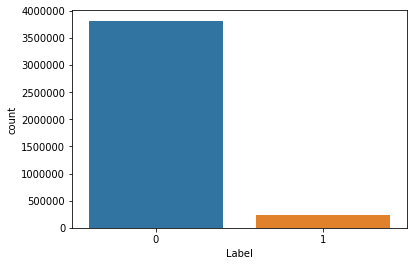

In [15]:
sns.countplot(train.Label)


In [16]:
train.Label.value_counts()

0    3814760
1     230812
Name: Label, dtype: int64

### To take a look at this first DICOM image, let's use the pylab.imshow() method:

(-0.5, 511.5, 511.5, -0.5)

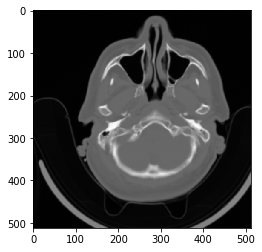

In [17]:

pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('on')

<a id="6"></a> <br>
## 6- Working newTable 

In [18]:
train['Sub_type'] = train['ID'].str.split("_", n = 3, expand = True)[2]
train['PatientID'] = train['ID'].str.split("_", n = 3, expand = True)[1]


In [19]:
train.head()

,ID,Label,Sub_type,PatientID
0,ID_63eb1e259_epidural,0,epidural,63eb1e259
1,ID_63eb1e259_intraparenchymal,0,intraparenchymal,63eb1e259
2,ID_63eb1e259_intraventricular,0,intraventricular,63eb1e259
3,ID_63eb1e259_subarachnoid,0,subarachnoid,63eb1e259
4,ID_63eb1e259_subdural,0,subdural,63eb1e259


In [20]:
gbSub = train.groupby('Sub_type').sum()
gbSub

,Label
Sub_type,
any,97103
epidural,2761
intraparenchymal,32564
intraventricular,23766
subarachnoid,32122
subdural,42496


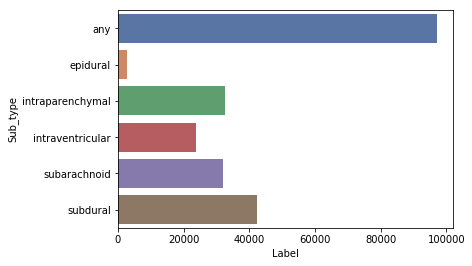

In [21]:
sns.barplot(y=gbSub.index, x=gbSub.Label, palette="deep")

Text(0.5, 1.0, 'Total Images by Subtype')

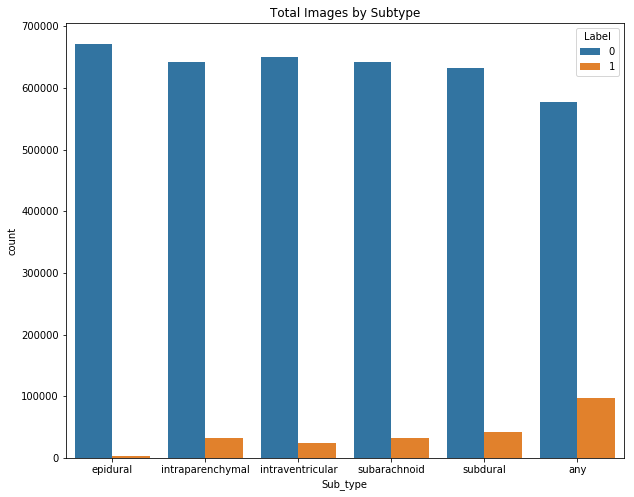

In [22]:
fig=plt.figure(figsize=(10, 8))

sns.countplot(x="Sub_type", hue="Label", data=train)

plt.title("Total Images by Subtype")

<a id="7"></a> <br>
## 7- Visualization of hemorrhage epidural

Reference of Correcting windows : https://www.kaggle.com/omission/eda-view-dicom-images-with-correct-windowing @Richard_McKinley

In [23]:

def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 
    

In [24]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [25]:
train_images_dir

def view_images(images, title = '', aug = None):
    width = 5
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(15,5))
    
    for im in range(0, height * width):
        ''''
        image = pydicom.read_file(os.path.join(train_images_dir,'ID_'+images[im]+ '.dcm')).pixel_array
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')'''''
        
        data = pydicom.read_file(os.path.join(train_images_dir,'ID_'+images[im]+ '.dcm'))
        image = data.pixel_array
        window_center , window_width, intercept, slope = get_windowing(data)
        image_windowed = window_image(image, window_center, window_width, intercept, slope)


        i = im // width
        j = im % width
        axs[i,j].imshow(image_windowed, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
        
        
    plt.suptitle(title)
    plt.show()

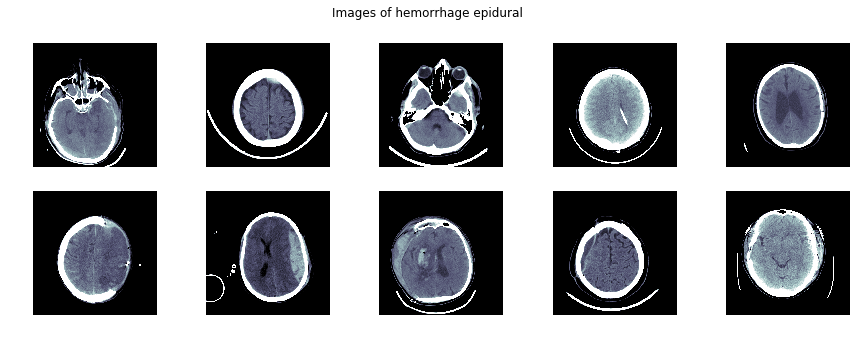

In [26]:
view_images(train[(train['Sub_type'] == 'epidural') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images of hemorrhage epidural')

<a id="8"></a> <br>
## 8- Visualization of hemorrhage intraparenchymal

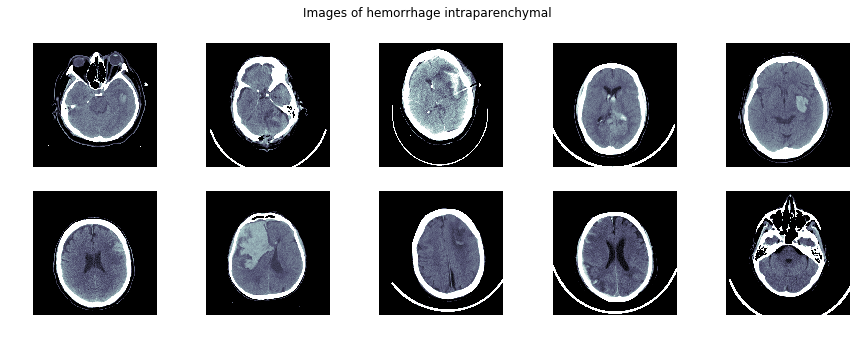

In [27]:
view_images(train[(train['Sub_type'] == 'intraparenchymal') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage intraparenchymal')

<a id="9"></a> <br>
## 9- Visualization of hemorrhage intraventricular

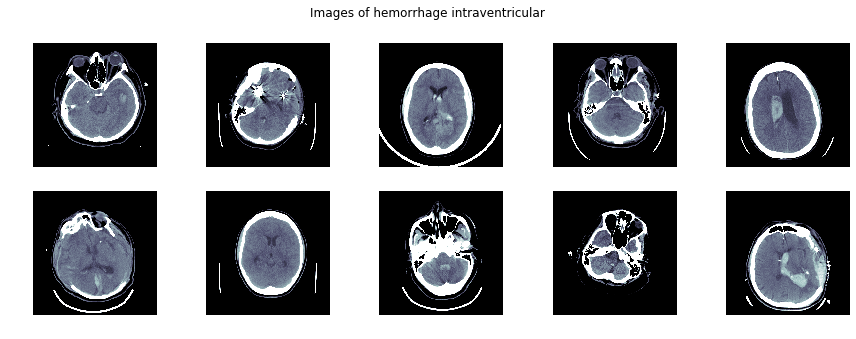

In [28]:
view_images(train[(train['Sub_type'] == 'intraventricular') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage intraventricular')

<a id="10"></a> <br>
## 10- Visualization of hemorrhage subarachnoid

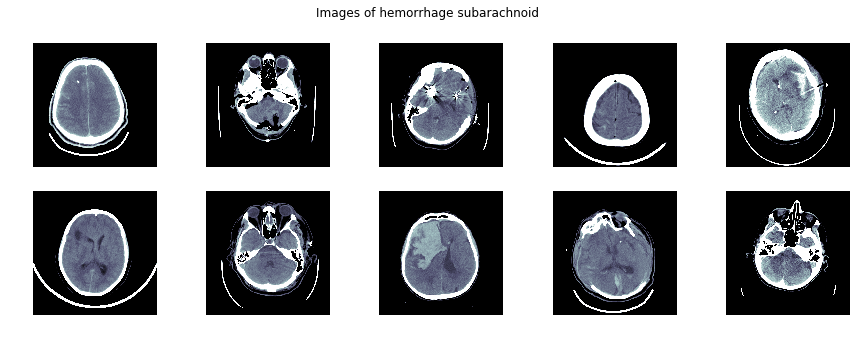

In [29]:
view_images(train[(train['Sub_type'] == 'subarachnoid') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage subarachnoid')

<a id="11"></a> <br>
## 11- Visualization of hemorrhage subdural

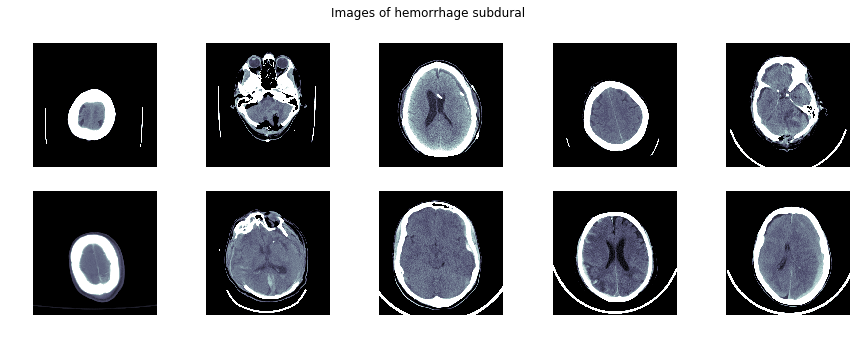

In [30]:
view_images(train[(train['Sub_type'] == 'subdural') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage subdural')

###  **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**

###  Good luck!

###### [Go to top](#top)